In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [16]:
#Problem 1

In [17]:
#a

In [3]:
df = pd.read_csv("Desktop/biden.csv")
df.describe()

,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


In [4]:
y = df["biden"]
X = df[["female","age","educ","dem","rep"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=25)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 6 columns):
biden     1807 non-null int64
female    1807 non-null int64
age       1807 non-null int64
educ      1807 non-null int64
dem       1807 non-null int64
rep       1807 non-null int64
dtypes: int64(6)
memory usage: 84.8 KB
None


In [33]:
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

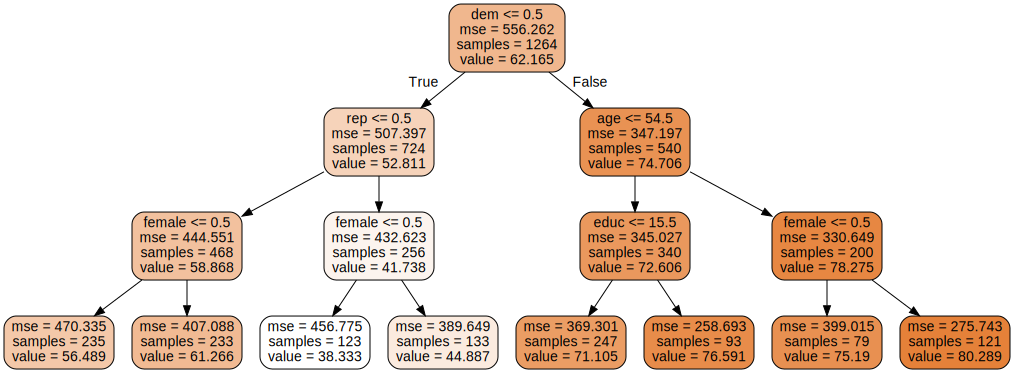

In [6]:
from sklearn.tree import export_graphviz
import graphviz

biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    feature_names=["female","age","educ","dem","rep"],
    class_names=df.biden,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

We can see from the tree that the sample is split based on parties, sex, education, and age. The first result on the left tells us that the mean value for a male who is neither a Republican nor a Democrat is 56.489. The group feeling 'coldest' for Biden is the male Republicans with a mean value of 38.3 and the group feeling 'warmest' for Biden is the female Democrats aged over 55. The average value is 80.289.

In [39]:
y_pred = biden_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE)

Test MSE= 396.1937146321307


In [40]:
#b

In [41]:
param_dist1 = {'max_depth': [3,10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

In [35]:
random_search1 = RandomizedSearchCV(biden_tree, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [43]:
random_search1.fit(X,y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1= 401.6903602232667


The optimal MSE is 401.69, max_depth is 3, min_sample_leaf is 17 and min_sample_split is 14.

In [44]:
#c

In [45]:
biden_forest = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25)
biden_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=True, random_state=25, verbose=0, warm_start=False)

In [48]:
param_dist2 = {'n_estimators':[10,200],
               'max_depth': [3,10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features':sp_randint(1,5)}
random_search2 = RandomizedSearchCV(biden_forest, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search2.fit(X,y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)

RandBestEstimator2= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore2= 397.0681090117028


The optimal MSE is 397.07, max_depth is 3, max_features is 2, min_sample_leaf is 17 and min_sample_split is 13.

In [49]:
#Problem 2

In [ ]:
#a

In [52]:
df = pd.read_csv("Desktop/Auto.csv", na_values='?')
df["mpg_high"] = np.where(df.mpg >= np.median(df.mpg),1,0)
df.dropna(inplace = True)
df["orgn1"] = np.where(df["origin"]==1,1,0)
df["orgn2"] = np.where(df["origin"]==2,1,0)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high,orgn1,orgn2
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000,0.625000,0.173469
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639,0.484742,0.379136
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000,1.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000,1.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


In [53]:
y = df["mpg_high"]
df['const']=1
X = df[["const","cylinders","displacement","horsepower",
      "weight","acceleration","year","orgn1","orgn2"]]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 13 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
mpg_high        392 non-null int32
orgn1           392 non-null int32
orgn2           392 non-null int32
const           392 non-null int64
dtypes: float64(4), int32(3), int64(5), object(1)
memory usage: 38.3+ KB
None


In [27]:
Xvars = X.values
yvars = y.values

k = 4
kf = KFold(n_splits = k, random_state = 25, shuffle = True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
err_high = np.zeros(k)
err_low = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    err_high[k_ind] = sum((y_pred != y_test)*(y_test == 1)) / sum(y_test == 1)
    err_low[k_ind] = sum((y_pred != y_test)*(y_test == 0)) / sum(y_test == 0)
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()

print('mean of test estimate MSE is', MSE_kf)
print('Error rate for mpg_high = 0 is', err_high.mean())
print('Error rate for mpg_high = 1 is', err_low.mean())

mean of test estimate MSE is 0.09693877551020408
Error rate for mpg_high = 0 is 0.07941477339674582
Error rate for mpg_high = 1 is 0.11364706285146922


In [56]:
#b

In [29]:
X = df[["cylinders","displacement","horsepower",
      "weight","acceleration","year","orgn1","orgn2"]]
y = df["mpg_high"]

In [30]:
mpg_forest = RandomForestRegressor(bootstrap=True, oob_score=True, random_state=25)
mpg_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=True, random_state=25, verbose=0, warm_start=False)

In [37]:
param_dist3 = {'n_estimators': [10, 200],
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}

tree = RandomForestClassifier(random_state = 25)

random_search3 = RandomizedSearchCV(tree, param_distributions = param_dist3,
                                    n_iter = 100, n_jobs = -1, cv = 4, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search3.fit(X, y)
print('Best Tuning Params3 =', random_search3.best_params_)
print('MSE3 =', -random_search3.best_score_)

Best Tuning Params3 = {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE3 = 0.08928571428571429


MSE is 0.089, max_depth is 8, max_features is 3, min_sample_leaf is 15 and min_sample_split is 2.

In [60]:
#c

In [61]:
mpg_svc= SVC(kernel="rbf", degree=2)
mpg_svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
from scipy.stats import uniform as sp_uniform
param_dist4 = {'C':sp_uniform(loc=0.2,scale=4.0),
               'gamma':["scale","auto_deprecated"],
               'shrinking':[True,False]}

In [63]:
random_search4 = RandomizedSearchCV(mpg_svc, param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')
random_search4.fit(X,y)
print('RandBestEstimator2=', random_search4.best_estimator_)
print('RandBestParams2=', random_search4.best_params_)
print('RandBestScore2=', -random_search4.best_score_)

RandBestEstimator2= SVC(C=1.8094629152568114, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)
RandBestParams2= {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
RandBestScore2= 0.11479591836734694


MSE is 0.11 when C=1.8, gamma= scale and no shrinking.

In [65]:
#d

The random forest classifier is the best model for predicting the mpg_high because it yields the lowest MSE.